# Project: What Affects Movie Ratings and Profits?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This analysis is based on the Movie Database (TMDb), which contains information about 10,000+ movies. The movie data includes independent variables such as movie cast/director/production company, and dependent variables such as user ratings, budget and revenue. In this analysis, we are trying to study the key features that are affecting user ratings and profits(revenue - budget). We will examine the release year, genere and production company respectively, and figure out whether each of them have an impact on movie ratings/profits.

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Load the TMDb data and plot an overview:

In [234]:
movies = pd.read_csv('~/Downloads/tmdb-movies.csv')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Check on rows and columns:

In [130]:
print(movies.shape)
print(movies.columns)

(10866, 21)
Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


Look at basic statistics/missing data:

In [347]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,3.381332e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,1.252151e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,1.292617e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [137]:
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

As we are studying the movie profit, we first calculate the profit by subtracting budget from revenue. We are using adjusted values here, as they have accounted for the inflation over time.

In [253]:
movies['profit_adj'] = movies.revenue_adj - movies.budget_adj

We also need to clean the genres data, as each movie in the dataset contains multiple generes seperated by '|'.

In [328]:
movies['genres'] = movies.genres.str.split("|")
genres_set_full = np.concatenate([i for i in movies['genres'] if isinstance(i, list)])
genres_set = np.unique(genres_set_full)
genres_list = pd.Series(genres_set_full).value_counts()

There are 20 generes in total:

In [179]:
print(genres_set)
print(len(genres_set))

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']
20


We calculate the mean of each numerical feature('profit_adj', 'vote_average', etc) group by genres. The result table will be used in the EDA sector.

In [184]:
genres_dat = pd.DataFrame()
for g in genres_set:
    idx = [i for i,t in movies.genres.items() if isinstance(t,list) and g in t]
    genres_dat[g] = movies.loc[idx,].mean()
genres_dat = genres_dat.T
genres_dat['genres'] = genres_dat.index

The production companies data is in same case as the genres data -- several values are included and seperated by '|':

In [235]:
movies['production_companies'] = movies.production_companies.str.split("|")
comp_set = np.concatenate([i for i in movies['production_companies'] if isinstance(i, list)])
comp_list = pd.Series(comp_set).value_counts()

As there are too many production companies, we only study the top 20 companies, ranked by count. The top 20 companies are as below:

In [259]:
comp_list[:20]

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
TriStar Pictures                          147
Miramax Films                             139
Relativity Media                          108
Regency Enterprises                        95
Canal+                                     92
Village Roadshow Pictures                  88
20th Century Fox                           88
DreamWorks SKG                             88
BBC Films                                  87
Dimension Films                            82
dtype: int64

We calculate the mean of each numerical feature('profit_adj','vote_average', etc) group by top 20 production companies. The results will be used in the EDA sector.

In [254]:
comp_dat = pd.DataFrame()
for c in comp_list[:20].index:
    idx = [i for i,t in movies.production_companies.items() if isinstance(t,list) and c in t]
    comp_dat[c] = movies.loc[idx,].mean()
comp_dat = comp_dat.T
comp_dat['company'] = comp_dat.index

<a id='eda'></a>
## Exploratory Data Analysis

> After trimmed and cleaned the data, let's move on to exploration. We will investigate the release year, genere and production company below, and figure out whether each of them would have an impact on movie ratings/profits.



### Research Question 1: Release Year Effects

We will first check out the count of movies released during 1960 - 2015:

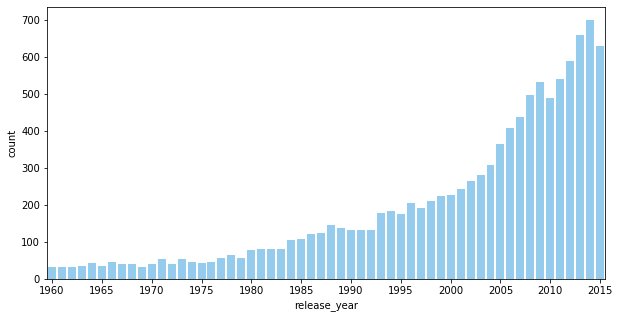

In [326]:
plt.figure(figsize=[10,5])
sb.countplot(data= movies, x = 'release_year', color = 'lightskyblue');
plt.xticks(range(0, 60, 5), range(1960, 2020, 5));

It seems that the movie industry is booming during this period and there are more movies released over time. <br>
Let's also look at the relationship between release year and movie rating.

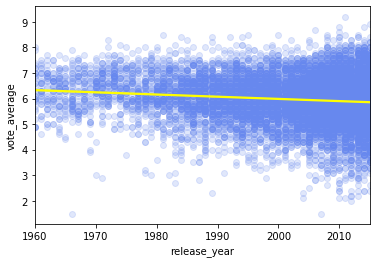

In [291]:
sb.set_palette('coolwarm')
sb.regplot(data= movies, x = 'release_year', y = 'vote_average', scatter_kws= {'alpha':0.2}, line_kws={'color':'yellow'});

As the yellow trend line in the above plot shows, the average rating of the movies is decreasing over time, while the number of movies released over time is actually increasing. <br>
Next, we look at the relationship between released year and movie profit.

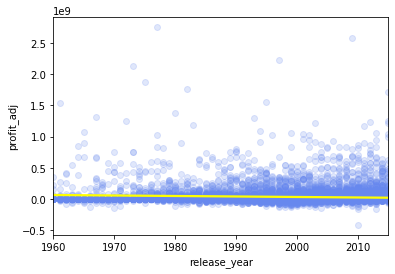

In [295]:
sb.regplot(data= movies, x = 'release_year', y = 'profit_adj', scatter_kws= {'alpha':0.2}, line_kws={'color':'yellow'});

Similiarly, a yellow trend line is plotted for profits vs release year, and it shows that the average profit of a movie is also decreasing over time. <br>
In summary, the movie ratings and profits are affected by release year, and as the release year being more recent, the rating/profit will decrease on average. This is probably because there are more movies released recently and the whole movie market is getting more competitve and diversified through these years.

### Research Question 2: Genres Effect

We first check the value counts of genres:

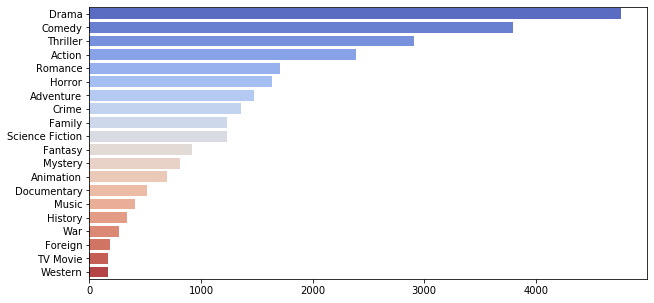

In [346]:
plt.figure(figsize=[10,5]);
sb.barplot(y = genres_list.index, x = genres_list.values, palette='coolwarm');

Drama/Comedy/Thriller are the most common genres, while War/Foreign/TV Movie/Western are the least common genres.<br>
Let's check the genre effect for profits:

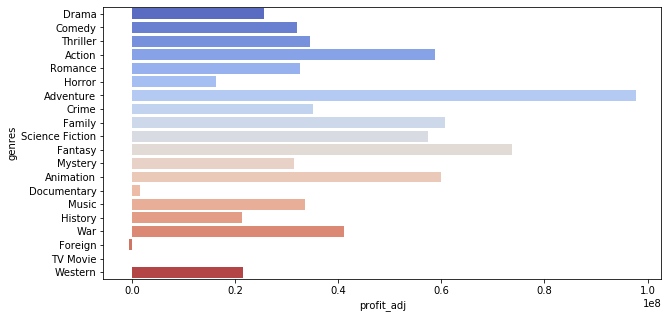

In [341]:
plt.figure(figsize = (10,5));
sb.barplot(data=genres_dat, y= 'genres', x = 'profit_adj', order = genres_list.index, palette='coolwarm');

It seems that genres does have a big impact on profits. Adventure/Fantasy/Family are the genres that earn most, while Documentary/Foreign/TV Movie are the genres that earn least. <br>
Let's also look at the genre effect for ratings:

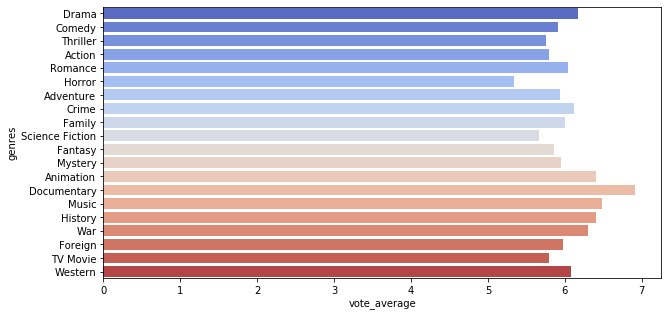

In [342]:
plt.figure(figsize = (10,5));
sb.barplot(data=genres_dat, y= 'genres', x = 'vote_average', order = genres_list.index, palette='coolwarm');

It seems that genres also have impact on ratings. Horror movie has the lowest average rating and documentary has the highest average rating. <br>
In summary, genres would affect both profits and ratings, but in a different way. The less common/popular genres would have lower profits, while the less realistic (horror and science fiction) genres would have lower ratings.


### Research Question 3: Production Company Effect

In this section, we investigate the effect of production companies. As stated, we only study the top 20 production company here.

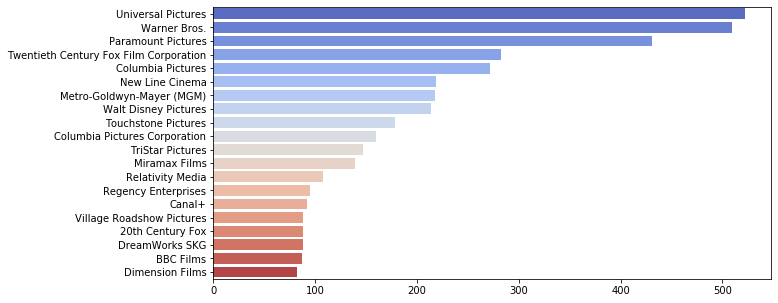

In [348]:
plt.figure(figsize=[10,5]);
sb.barplot(y = comp_list[:20].index, x = comp_list[:20].values, palette='coolwarm');

It seems that the movie industry is monopolized by Universal, Warner Bros, Paramount and 20th Century Fox. We will study the impact of production companies on profits:

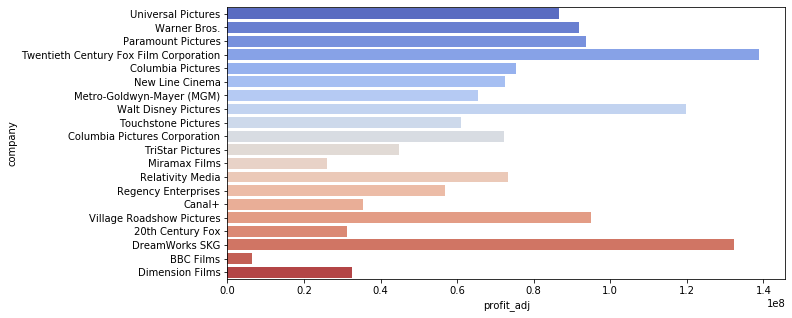

In [344]:
plt.figure(figsize = (10,5));
sb.barplot(data=comp_dat, y= 'company', x = 'profit_adj', order = comp_list[:20].index, palette='coolwarm');

The 21 Centry Fox, Walt Disney Pictures and DreamWorks SKG seems to be the production companies that's earning the most. One interesting thing to notice is that these companies have a focus on animation, which is a high-profit genre.

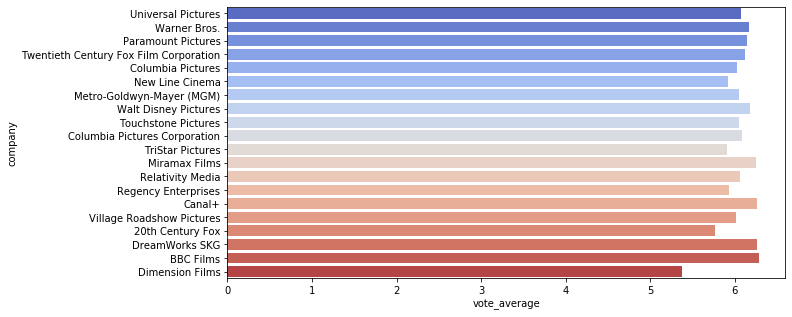

In [351]:
plt.figure(figsize = (10,5));
sb.barplot(data=comp_dat, y= 'company', x = 'vote_average', order = comp_list[:20].index, palette='coolwarm');

It seems that in terms of rating, the production company doesn't make much difference, except for the Dimension Films here. However, Dimension Film is speciallized in horror/science fiction movies, which are the most unwelcome movie genres. <br>
In summary, the production company has some impact on the profit, as the profit is related to production company's market share. Top company would earn more profit, as a result of market occupation. The production company has minimal impact on ratings though, unless the production company is specialized in certain genres.

<a id='conclusions'></a>
## Conclusions


In summary, the movie ratings and profits are affected by release year, genres and production companies. As the release year being more recent, the rating/profit will decrease on average. The less common/popular genres would have lower profits, while the less realistic genres would have lower ratings. Production companies with higher market shares would generate more profit, and production companies with concentration on unwelcome genres would have lower profits/ratings.